In [77]:
import pandas as pd
import numpy as np

In [78]:
train = pd.read_csv('house-prices-advanced-regression-techniques/kc_house_data.csv')

In [79]:
print (train.head())
print (train.shape)

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [80]:
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
None


In [106]:
print (train['waterfront'].value_counts())

0    21450
1      163
Name: waterfront, dtype: int64


In [81]:
print (train['view'].value_counts())

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64


In [82]:
print (train['condition'].value_counts())
#dummy encode condition variable
condition_dummy = pd.get_dummies(train['condition'],prefix='condition')
train=pd.concat([train,condition_dummy],axis=1)
print (train.head())

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64
           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  zipcode      lat     long  \
0      5650     1.0           0     0  ...    98178  47.5112 -122.257   
1      7242     2.0           0     0  ...    98125  47.7210 -122.319   
2     10000     1.0           0     0  ...    98028  47.7379 -122.233   
3      5000     1.0           0     0  ...    98136  47.5208 -122.393   
4      8080     1.0           0     0  ...    98074  47.6168 -122.045   

   sqft

In [83]:
print (train.groupby(by=['condition']).agg({'price':'mean'}).sort_values(by='price'))

                   price
condition               
2          327287.145349
1          334431.666667
4          521200.390033
3          542012.578148
5          612418.089359


In [84]:
print (train.groupby(by=['view']).agg({'price':'mean'}).sort_values(by='price').sort_values(by='price'))
#dummy encode view variable
view_dummy = pd.get_dummies(train['view'],prefix='view')
train=pd.concat([train,view_dummy],axis=1)

             price
view              
0     4.965642e+05
2     7.924009e+05
1     8.122808e+05
3     9.719653e+05
4     1.463711e+06


In [85]:
print (train.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  condition_1  condition_2  \
0      5650     1.0           0     0  ...            0            0   
1      7242     2.0           0     0  ...            0            0   
2     10000     1.0           0     0  ...            0            0   
3      5000     1.0           0     0  ...            0            0   
4      8080     1.0           0     0  ...            0            0   

   condition_3  condition_4  condition_5  view_0  view_1  view_2  view_3  \
0            1        

In [157]:
print (pd.pivot_table(train, index='grade', values='price', aggfunc=np.mean).sort_values(by='price'))

#keep grade variable as the same

#adding dummy just to see the negative impact of doing it on grade

#dummy encode view variable
grade_dummy = pd.get_dummies(train['grade'],prefix='grade')
train=pd.concat([train,grade_dummy],axis=1)

              price
grade              
1      1.420000e+05
3      2.056667e+05
4      2.143810e+05
5      2.485240e+05
6      3.019196e+05
7      4.025903e+05
8      5.428528e+05
9      7.735132e+05
10     1.071771e+06
11     1.496842e+06
12     2.191222e+06
13     3.709615e+06


In [87]:
print (train['grade'].value_counts())

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


In [88]:
#create a flag for sqft_basement=0
train['No_basement']=0
train.loc[train.sqft_basement==0,'No_basement']=1

In [89]:
train[train['No_basement']==0][['sqft_above','sqft_basement','price','sqft_living','sqft_lot']].corr()


,sqft_above,sqft_basement,price,sqft_living,sqft_lot
sqft_above,1.000000,0.386784,0.714981,0.919976,0.207473
sqft_basement,0.386784,1.000000,0.407308,0.717299,0.155285
price,0.714981,0.407308,1.000000,0.713348,0.068569
sqft_living,0.919976,0.717299,0.713348,1.000000,0.222765
sqft_lot,0.207473,0.155285,0.068569,0.222765,1.000000


In [90]:
print (train.groupby(by='No_basement').agg({'price':['mean','count']}))

                     price       
                      mean  count
No_basement                      
0            622373.563803   8487
1            486884.090507  13126


In [91]:
print (train[['sqft_above','sqft_basement','price','sqft_living','sqft_lot']])

       sqft_above  sqft_basement      price  sqft_living  sqft_lot
0            1180              0   221900.0         1180      5650
1            2170            400   538000.0         2570      7242
2             770              0   180000.0          770     10000
3            1050            910   604000.0         1960      5000
4            1680              0   510000.0         1680      8080
5            3890           1530  1225000.0         5420    101930
6            1715              0   257500.0         1715      6819
7            1060              0   291850.0         1060      9711
8            1050            730   229500.0         1780      7470
9            1890              0   323000.0         1890      6560
10           1860           1700   662500.0         3560      9796
11            860            300   468000.0         1160      6000
12           1430              0   310000.0         1430     19901
13           1370              0   400000.0         1370      

In [92]:
train['total_sq_feet_without_lot'] = train ['sqft_above']+train['sqft_basement']+train['sqft_living']

In [93]:
train[['total_sq_feet_without_lot','price']].corr()

,total_sq_feet_without_lot,price
total_sq_feet_without_lot,1.000000,0.702035
price,0.702035,1.000000


In [94]:
train['years_old'] = 2019-train['yr_built']

In [95]:
train['renovated']=0
train.loc[train.yr_renovated>0,'renovated']=1

In [96]:
print (train.groupby(by='renovated').agg({'price':['mean','count']}))

                   price       
                    mean  count
renovated                      
0          530360.818155  20699
1          760379.029540    914


In [97]:

train.loc[train.yr_renovated>0,'last_renovated'] = 2019-train['yr_renovated']
train.loc[train.yr_renovated==0,'last_renovated'] = 2019-train['yr_built']


    last_renovated          price      
                             mean count
0              4.0  729876.592593    54
1              5.0  679632.184615   650
2              6.0  676387.336134   238
3              7.0  533387.000000   181
4              8.0  550246.923077   143
5              9.0  600887.881988   161
6             10.0  551765.138889   252
7             11.0  660258.888312   385
8             12.0  632310.128319   452
9             13.0  638824.064854   478
10            14.0  597698.393814   485
11            15.0  606527.226580   459
12            16.0  592201.262582   457
13            17.0  636134.233607   244
14            18.0  761447.354938   324
15            19.0  699401.142292   253
16            20.0  663790.468085   282
17            21.0  606533.808594   256
18            22.0  607183.427083   192
19            23.0  640132.826923   208
20            24.0  597409.054054   185
21            25.0  519168.097015   268
22            26.0  581627.475113   221


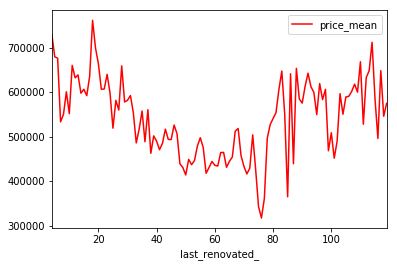

In [98]:
grouped_reno=train.groupby(by='last_renovated',as_index=False).agg({'price':['mean','count']})

#grouped_reno.columns=grouped_reno.columns.droplevel(level=1)
#grouped_reno.rename(columns={'price':'mean','price':'count'},inplace=True)
print (grouped_reno)
print (type(grouped_reno.columns))
print ((grouped_reno.columns))
grouped_reno.columns = grouped_reno.columns.map('_'.join)

print (grouped_reno.head())
import matplotlib.pyplot as plt
grouped_reno[grouped_reno.last_renovated_<300].plot(kind='line',x='last_renovated_',y='price_mean',color='red')

In [99]:
print (train['zipcode'])

0        98178
1        98125
2        98028
3        98136
4        98074
5        98053
6        98003
7        98198
8        98146
9        98038
10       98007
11       98115
12       98028
13       98074
14       98107
15       98126
16       98019
17       98103
18       98002
19       98003
20       98133
21       98040
22       98092
23       98030
24       98030
25       98002
26       98119
27       98112
28       98115
29       98052
         ...  
21583    98102
21584    98116
21585    98042
21586    98107
21587    98125
21588    98117
21589    98038
21590    98074
21591    98178
21592    98103
21593    98056
21594    98042
21595    98103
21596    98059
21597    98040
21598    98001
21599    98053
21600    98004
21601    98125
21602    98010
21603    98065
21604    98144
21605    98056
21606    98136
21607    98116
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 21613, dtype: int64


In [100]:
train_zip= (train.groupby(by='zipcode',as_index=False).agg({'price':'mean'}))
train_zip.rename(columns={'price':'price_zip_mean'},inplace=True)
print (train_zip)

    zipcode  price_zip_mean
0     98001    2.808047e+05
1     98002    2.342840e+05
2     98003    2.941113e+05
3     98004    1.355927e+06
4     98005    8.101649e+05
5     98006    8.596848e+05
6     98007    6.171051e+05
7     98008    6.455074e+05
8     98010    4.236660e+05
9     98011    4.903515e+05
10    98014    4.556171e+05
11    98019    4.247887e+05
12    98022    3.157093e+05
13    98023    2.867328e+05
14    98024    5.805268e+05
15    98027    6.169906e+05
16    98028    4.624800e+05
17    98029    6.126536e+05
18    98030    2.961880e+05
19    98031    3.005399e+05
20    98032    2.512962e+05
21    98033    8.037195e+05
22    98034    5.216529e+05
23    98038    3.668676e+05
24    98039    2.160607e+06
25    98040    1.194230e+06
26    98042    3.116321e+05
27    98045    4.394711e+05
28    98052    6.452315e+05
29    98053    6.781631e+05
..      ...             ...
40    98092    3.349211e+05
41    98102    9.012583e+05
42    98103    5.849192e+05
43    98105    8.628

In [101]:
#using the average of the price by zipcode as the feature instead of zipcode
train = pd.merge(train, train_zip, on='zipcode')

In [102]:
print (train[['zipcode','price_zip_mean']])

       zipcode  price_zip_mean
0        98178    3.106128e+05
1        98178    3.106128e+05
2        98178    3.106128e+05
3        98178    3.106128e+05
4        98178    3.106128e+05
5        98178    3.106128e+05
6        98178    3.106128e+05
7        98178    3.106128e+05
8        98178    3.106128e+05
9        98178    3.106128e+05
10       98178    3.106128e+05
11       98178    3.106128e+05
12       98178    3.106128e+05
13       98178    3.106128e+05
14       98178    3.106128e+05
15       98178    3.106128e+05
16       98178    3.106128e+05
17       98178    3.106128e+05
18       98178    3.106128e+05
19       98178    3.106128e+05
20       98178    3.106128e+05
21       98178    3.106128e+05
22       98178    3.106128e+05
23       98178    3.106128e+05
24       98178    3.106128e+05
25       98178    3.106128e+05
26       98178    3.106128e+05
27       98178    3.106128e+05
28       98178    3.106128e+05
29       98178    3.106128e+05
...        ...             ...
21583   

In [103]:
print (train.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  4060000240  20140623T000000  205425.0         2       1.00          880   
2  4058801670  20140717T000000  445000.0         3       2.25         2100   
3  2976800796  20140925T000000  236000.0         3       1.00         1300   
4  6874200960  20150227T000000  170000.0         2       1.00          860   

   sqft_lot  floors  waterfront  view  ...  view_1  view_2  view_3  view_4  \
0      5650     1.0           0     0  ...       0       0       0       0   
1      6780     1.0           0     0  ...       0       0       0       0   
2      8201     1.0           0     2  ...       0       1       0       0   
3      5898     1.0           0     0  ...       0       0       0       0   
4      5265     1.0           0     0  ...       0       0       0       0   

   No_basement  total_sq_feet_without_lot  years_old  renovate

In [158]:
print (train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21613 entries, 0 to 21612
Data columns (total 49 columns):
id                           21613 non-null int64
date                         21613 non-null object
price                        21613 non-null float64
bedrooms                     21613 non-null int64
bathrooms                    21613 non-null float64
sqft_living                  21613 non-null int64
sqft_lot                     21613 non-null int64
floors                       21613 non-null float64
waterfront                   21613 non-null int64
view                         21613 non-null int64
condition                    21613 non-null int64
grade                        21613 non-null int64
sqft_above                   21613 non-null int64
sqft_basement                21613 non-null int64
yr_built                     21613 non-null int64
yr_renovated                 21613 non-null int64
zipcode                      21613 non-null int64
lat                          21613

In [165]:
from sklearn.model_selection import train_test_split
features=['bedrooms','bathrooms','sqft_living','floors','waterfront','view_0','view_1'
         ,'view_2','view_3','view_4','condition_1','condition_2','condition_3','condition_4'
         ,'condition_5','sqft_basement','No_basement','total_sq_feet_without_lot'
         ,'years_old','renovated','last_renovated','price_zip_mean',
          #'grade_1','grade_3','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9',
         #'grade_10','grade_11','grade_12','grade_13'
         'grade']

X_train, X_test, y_train, y_test = train_test_split(train[features]
                                                    , train['price'], 
                                                    test_size=0.20, random_state=42)

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=8, random_state=0,
                             n_estimators=100)
regr.fit(X_train,y_train)
pred= regr.predict(X_test)
print (regr.score(X_test, y_test))

from sklearn.metrics import r2_score
print (r2_score(y_test, pred))

0.8496462631985671
0.8496462631985671


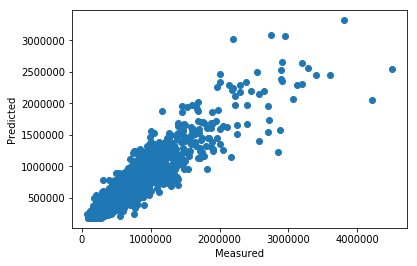

In [133]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred)
#ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [109]:
print (reg.coef_)

[-2.99463061e+04  3.58726729e+04  3.44931933e+01  1.42145794e+03
  4.97701927e+05 -1.28693772e+05 -4.76712062e+04 -6.27828441e+04
  2.56100111e+04  2.13537811e+05 -4.79711787e+04 -3.17897467e+03
  3.75277900e+03  7.95561602e+02  4.66018127e+04  6.31899305e+04
 -2.90804935e+01  1.78702397e+03  6.89863865e+01  2.22492051e+03
  6.68098887e+03 -1.32084681e+02  6.35402882e-01]


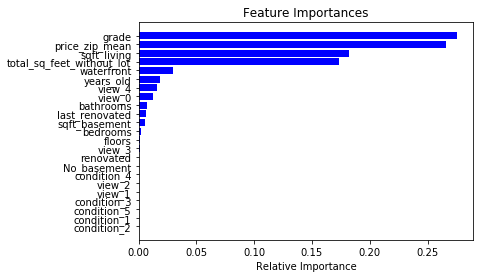

In [166]:
features = features
importances = regr.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [143]:
np.concatenate((pred, y_test), axis=0)

array([738333.28368449, 383800.89601376, 575331.18417681, ...,
       335000.        , 280000.        , 230000.        ])

In [149]:
print (len(list(pred)))
print (len(list(y_test)))

4323
4323


      total_sq_feet_without_lot         price
0                           580  1.420000e+05
1                           740  2.760000e+05
2                           760  2.450000e+05
3                           768  2.650000e+05
4                           780  2.365000e+05
5                           820  3.250000e+05
6                           840  2.545250e+05
7                           860  8.000000e+04
8                           880  2.900000e+05
9                           920  2.470000e+05
10                          940  1.742500e+05
11                          960  1.575000e+05
12                          980  1.500000e+05
13                         1000  1.250000e+05
14                         1040  2.590833e+05
15                         1060  3.310000e+05
16                         1080  3.850000e+05
17                         1100  2.365000e+05
18                         1120  1.862250e+05
19                         1140  2.199833e+05
20                         1160  2

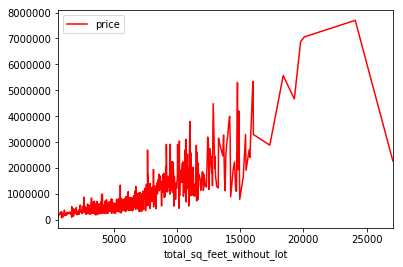

In [152]:
area_price=train.groupby(by='total_sq_feet_without_lot',as_index=False).agg({'price':'mean'})
print (area_price)
area_price.plot(kind='line',x='total_sq_feet_without_lot',y='price',color='red')